In [2]:
# Test if scikit-learn is properly installed
try:
    import sklearn
    print(f"scikit-learn version: {sklearn.__version__}")
except ImportError:
    print("scikit-learn not installed! Please run: pip install scikit-learn")

scikit-learn version: 1.6.1


In [15]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [24]:
# Setting the style for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

In [23]:
# Loading and Exploring the Dataset
print("=== Loading and Exploring the Dataset ===")
cancer_data = load_breast_cancer()
X = cancer_data.data  # Features
y = cancer_data.target  # Target variable (0 = malignant, 1 = benign)
feature_names = cancer_data.feature_names
target_names = cancer_data.target_names

print(f"Dataset shape: {X.shape}")
print(f"Number of features: {len(feature_names)}")
print(f"Feature names: {feature_names}")
print(f"Target names: {target_names}")
print(f"Class distribution: {np.bincount(y)}")

# We then created a DataFrame for better visualization
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['diagnosis'] = df['target'].map({0: 'Malignant', 1: 'Benign'})

print("\nFirst 5 rows of the dataset:")
print(df.head())



=== Loading and Exploring the Dataset ===
Dataset shape: (569, 30)
Number of features: 30
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']
Class distribution: [212 357]

First 5 rows of the dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69 

In [16]:
# Data Preprocessing - Standardization
print("\n=== Data Preprocessing ===")
"""
WHY STANDARDIZATION IS CRUCIAL FOR PCA:
- PCA is sensitive to the scale of features
- Features with larger scales would dominate the principal components
- Standardization transforms all features to have mean=0 and std=1
- This ensures all features contribute equally to PCA
"""
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Before standardization - Mean and Std of first 5 features:")
print(f"Means: {X[:, :5].mean(axis=0)}")
print(f"Std: {X[:, :5].std(axis=0)}")

print("\nAfter standardization - Mean and Std of first 5 features:")
print(f"Means: {X_scaled[:, :5].mean(axis=0)}")
print(f"Std: {X_scaled[:, :5].std(axis=0)}")



=== Data Preprocessing ===
Before standardization - Mean and Std of first 5 features:
Means: [1.41272917e+01 1.92896485e+01 9.19690334e+01 6.54889104e+02
 9.63602812e-02]
Std: [3.52095076e+00 4.29725464e+00 2.42776193e+01 3.51604754e+02
 1.40517641e-02]

After standardization - Mean and Std of first 5 features:
Means: [-3.16286735e-15 -6.53060890e-15 -7.07889127e-16 -8.79983452e-16
  6.13217737e-15]
Std: [1. 1. 1. 1. 1.]


In [22]:
# We implement PCA and reduce to 2 Components
print("\n=== Principal Component Analysis ===")
"""
WHAT HAPPENS IN PCA:
1. PCA finds the directions (principal components) of maximum variance in data
2. First PC captures the most variance, second PC captures the next most, etc.
3. We transform our data to these new coordinates
4. This reduces dimensionality while preserving important patterns
"""
pca = PCA(n_components=2)  # We want to reduce to 2 dimensions
X_pca = pca.fit_transform(X_scaled)

print(f"Original shape: {X.shape}")
print(f"Reduced shape: {X_pca.shape}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained by 2 components: {sum(pca.explained_variance_ratio_):.4f}")




=== Principal Component Analysis ===
Original shape: (569, 30)
Reduced shape: (569, 2)
Explained variance ratio: [0.44272026 0.18971182]
Total variance explained by 2 components: 0.6324


In [21]:
# Analyze PCA Results
print("\n=== PCA Analysis ===")
# We then created a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['diagnosis'] = df['diagnosis']
pca_df['target'] = y

print("PCA Components (loadings) - how original features contribute to PCs:")
# Next we create a DataFrame showing feature contributions to principal components
components_df = pd.DataFrame(
    pca.components_,
    columns=feature_names,
    index=['PC1', 'PC2']
)

print("\nTop 5 features contributing to PC1:")
print(components_df.loc['PC1'].abs().sort_values(ascending=False).head())

print("\nTop 5 features contributing to PC2:")
print(components_df.loc['PC2'].abs().sort_values(ascending=False).head())




=== PCA Analysis ===
PCA Components (loadings) - how original features contribute to PCs:

Top 5 features contributing to PC1:
mean concave points     0.260854
mean concavity          0.258400
worst concave points    0.250886
mean compactness        0.239285
worst perimeter         0.236640
Name: PC1, dtype: float64

Top 5 features contributing to PC2:
mean fractal dimension     0.366575
fractal dimension error    0.280092
worst fractal dimension    0.275339
mean radius                0.233857
compactness error          0.232716
Name: PC2, dtype: float64



=== Visualization ===
Creating PCA scatter plot...
Legend elements type: <class 'tuple'>
Number of legend elements: 2
First element type: <class 'list'>
Number of handles: 2
Target names: ['malignant' 'benign']
Target names type: <class 'numpy.ndarray'>
✓ Legend created successfully
Creating explained variance plot...
Creating cumulative variance plot...
Creating feature importance plot...


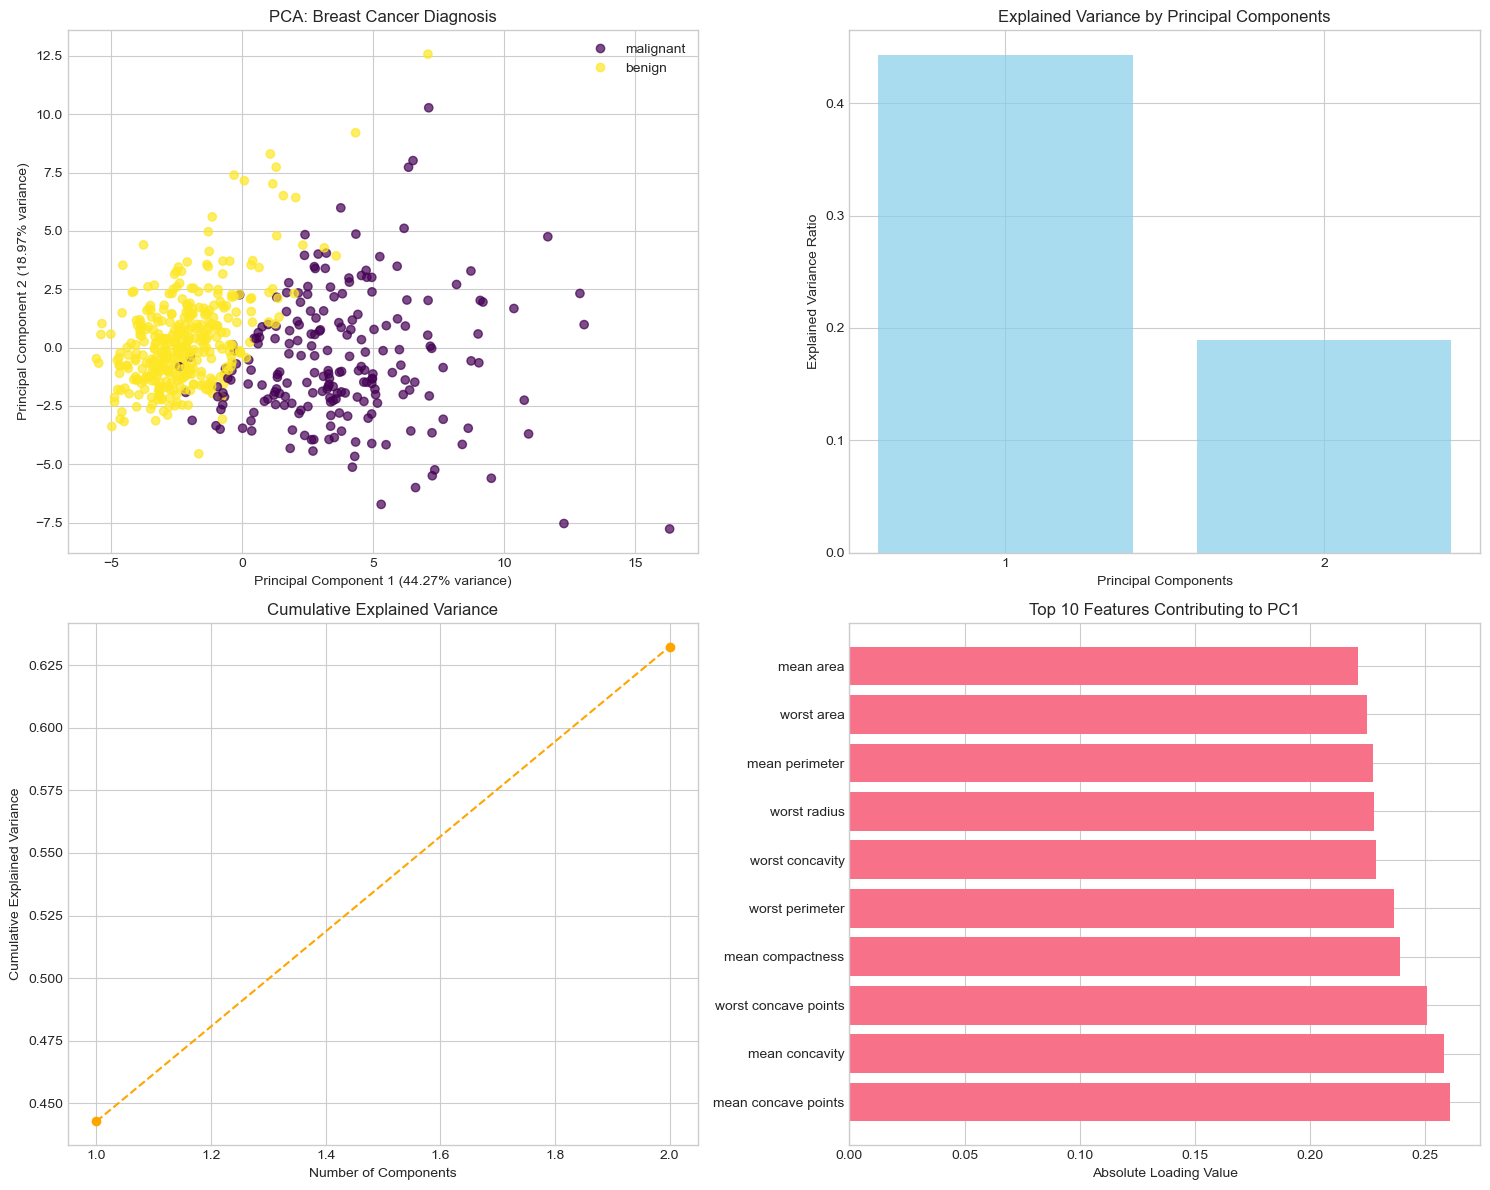

✓ All visualizations created successfully!


In [20]:
# Data Visualization 
print("\n=== Visualization ===")

try:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Plot 1: PCA Results - FIXED
    print("Creating PCA scatter plot...")
    scatter = axes[0,0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
    
    #  Checking what legend_elements() returns
    legend_elements = scatter.legend_elements()
    print(f"Legend elements type: {type(legend_elements)}")
    print(f"Number of legend elements: {len(legend_elements)}")
    print(f"First element type: {type(legend_elements[0])}")
    print(f"Number of handles: {len(legend_elements[0])}")
    print(f"Target names: {target_names}")
    print(f"Target names type: {type(target_names)}")
    
    #  Convert numpy arrays to lists and ensure proper handling
    if len(legend_elements) > 0 and len(legend_elements[0]) == len(target_names):
        handles = list(legend_elements[0])  # Convert to list
        labels_list = list(target_names)    # Convert to list
        axes[0,0].legend(handles=handles, labels=labels_list)
        print("✓ Legend created successfully")
    else:
        print("⚠ Creating manual legend due to element mismatch")
        # Alternative: Create legend manually
        from matplotlib.lines import Line2D
        legend_elements = [
            Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', 
                   markersize=10, label='Malignant'),
            Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', 
                   markersize=10, label='Benign')
        ]
        axes[0,0].legend(handles=legend_elements)
    
    axes[0,0].set_xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
    axes[0,0].set_ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
    axes[0,0].set_title('PCA: Breast Cancer Diagnosis')
    
    # Plot 2: Explained Variance
    print("Creating explained variance plot...")
    components = range(1, len(pca.explained_variance_ratio_) + 1)
    axes[0,1].bar(components, pca.explained_variance_ratio_, alpha=0.7, color='skyblue')
    axes[0,1].set_xlabel('Principal Components')
    axes[0,1].set_ylabel('Explained Variance Ratio')
    axes[0,1].set_title('Explained Variance by Principal Components')
    axes[0,1].set_xticks(components)
    
    # Plot 3: Cumulative Explained Variance
    print("Creating cumulative variance plot...")
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    axes[1,0].plot(components, cumulative_variance, marker='o', linestyle='--', color='orange')
    axes[1,0].set_xlabel('Number of Components')
    axes[1,0].set_ylabel('Cumulative Explained Variance')
    axes[1,0].set_title('Cumulative Explained Variance')
    axes[1,0].grid(True)
    
    # Plot 4: Feature importance for PC1
    print("Creating feature importance plot...")
    top_features_pc1 = components_df.loc['PC1'].abs().sort_values(ascending=False).head(10)
    axes[1,1].barh(range(len(top_features_pc1)), top_features_pc1.values)
    axes[1,1].set_yticks(range(len(top_features_pc1)))
    axes[1,1].set_yticklabels(top_features_pc1.index)
    axes[1,1].set_xlabel('Absolute Loading Value')
    axes[1,1].set_title('Top 10 Features Contributing to PC1')
    
    plt.tight_layout()
    plt.savefig('pca_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ All visualizations created successfully!")
    
except Exception as e:
    print(f"❌ Error in visualization: {e}")
    print("Trying alternative visualization approach...")
    
    # Alternative simplified visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Simple scatter plot without complex legend
    scatter = ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
    ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
    ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
    ax1.set_title('PCA: Breast Cancer Diagnosis')
    # Add simple legend
    ax1.legend(handles=[
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='Malignant'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='Benign')
    ])
    
    # Cumulative variance
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'o-')
    ax2.set_xlabel('Number of Components')
    ax2.set_ylabel('Cumulative Explained Variance')
    ax2.set_title('Cumulative Explained Variance')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.savefig('pca_analysis_simple.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Simplified visualizations created as backup!")




=== Logistic Regression Prediction ===
Logistic Regression Accuracy with PCA: 0.9591

Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.94      0.94        64
      benign       0.96      0.97      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



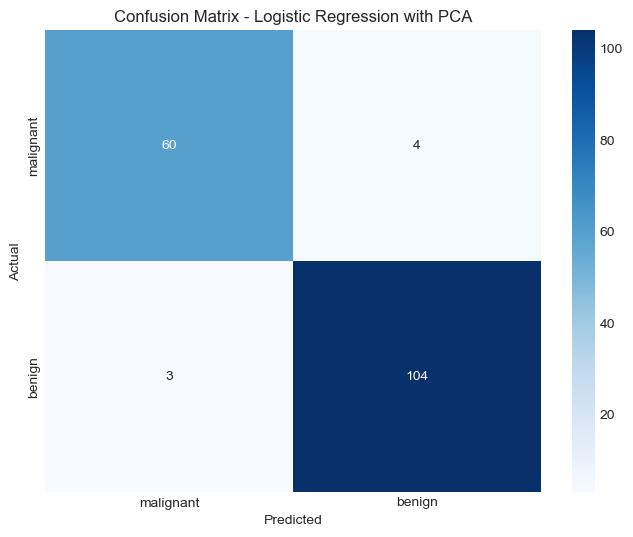

In [18]:
# Logistic Regression with PCA
print("\n=== Logistic Regression Prediction ===")
"""
WHY USE LOGISTIC REGRESSION AFTER PCA:
1. Reduced dimensionality prevents overfitting
2. Removes multicollinearity between features
3. Improves model performance and interpretability
4. Faster training with fewer features
"""

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.3, random_state=42, stratify=y
)

# Train logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy with PCA: {accuracy:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - Logistic Regression with PCA')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()



In [17]:
# Interpretation and Recommendations
print("\n=== Interpretation and Recommendations ===")
print("ESSENTIAL VARIABLES IDENTIFIED BY PCA:")

# Get the most important features for donor funding
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'pc1_loading': components_df.loc['PC1'],
    'pc2_loading': components_df.loc['PC2'],
    'absolute_importance': np.abs(components_df.loc['PC1']) + np.abs(components_df.loc['PC2'])
})

# Sort by importance
feature_importance = feature_importance.sort_values('absolute_importance', ascending=False)

print("\nTop 10 Most Important Features for Donor Funding:")
print(feature_importance.head(10)[['feature', 'absolute_importance']])

print(f"\nKEY INSIGHTS:")
print(f"1. The first 2 principal components explain {sum(pca.explained_variance_ratio_):.2%} of total variance")
print(f"2. Most important features for distinguishing cancer types:")
for i, row in feature_importance.head(5).iterrows():
    print(f"   - {row['feature']} (Importance: {row['absolute_importance']:.4f})")
print(f"3. Logistic regression achieved {accuracy:.2%} accuracy using only 2 components")
print(f"4. This demonstrates that essential information is preserved in reduced dimensions")

# Save results
feature_importance.to_csv('feature_importance_analysis.csv', index=False)
pca_df.to_csv('pca_transformed_data.csv', index=False)

print("\n=== ANALYSIS COMPLETE ===")
print("Files saved:")
print("- pca_analysis.png: Visualizations of PCA results")
print("- confusion_matrix.png: Model performance")
print("- feature_importance_analysis.csv: Feature rankings")
print("- pca_transformed_data.csv: Transformed dataset")


=== Interpretation and Recommendations ===
ESSENTIAL VARIABLES IDENTIFIED BY PCA:

Top 10 Most Important Features for Donor Funding:
                                         feature  absolute_importance
mean radius                          mean radius             0.452760
mean area                              mean area             0.452072
worst radius                        worst radius             0.447863
worst area                            worst area             0.444222
mean perimeter                    mean perimeter             0.442719
worst perimeter                  worst perimeter             0.436518
mean fractal dimension    mean fractal dimension             0.430939
worst fractal dimension  worst fractal dimension             0.407123
compactness error              compactness error             0.403109
mean compactness                mean compactness             0.391177

KEY INSIGHTS:
1. The first 2 principal components explain 63.24% of total variance
2. Most impo